# DATA VISUALISATION OF GERARD IRAO

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd 

## LOADING THE DATASET

In [54]:
dd.read_csv("../../../../../data/big data/taxi_final.csv")

,Type,PROVIDER NAME,StartDateTime,DateCreated,ID,ExternalID,FareAmount,GratuityAmount,SurchargeAmount,ExtraFareAmount,TollAmount,TotalAmount,PaymentType,StartDateTime.1,EndDateTime,OriginStreetNumber,OriginStreetName,OriginCity,OriginState,OriginZip,OriginLatitude,OriginLongitude,DestinationStreetNumber,DestinationStreetName,DestinationCity,DestinationState,DestinationZip,DestinationLatitude,DestinationLongitude,Milage,Duration,Unnamed: 31
npartitions=65,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,int64,string,string,string,string,int64,float64,float64,float64,float64,float64,float64,int64,string,string,float64,string,float64,string,int64,float64,float64,float64,string,float64,string,int64,float64,float64,float64,int64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


## PERFORM DATA CLEANING

#### declare dataframe datatypes and columsn needed for the analysis

In [55]:
cols = ['StartDateTime','EndDateTime','Duration','Milage',
        'PROVIDER NAME','Type','TotalAmount',
        'DestinationLatitude','DestinationLongitude','PaymentType']
date_cols = ['StartDateTime','EndDateTime']

dtype_mapping = {'Duration':np.float32, 'Milage':np.float32, 'TotalAmount':np.float32,
                 'PROVIDER NAME':'category','Type':'category',
                 'DestinationLatitude':np.float32,'DestinationLongitude':np.float32,'PaymentType': np.float32}

#### load the new dataset with new datatypes and selected columns

In [56]:
df = dd.read_csv("../../../../../data/big data/taxi_final.csv",blocksize="64MB", # chunksize
                   usecols=cols, dtype=dtype_mapping,
                   parse_dates=date_cols, date_format="%Y-%m-%d %H:%M:%S",
                   na_values='data unavailable')
df

,Type,PROVIDER NAME,StartDateTime,TotalAmount,PaymentType,EndDateTime,DestinationLatitude,DestinationLongitude,Milage,Duration
npartitions=65,,,,,,,,,,
,category[unknown],category[unknown],string,float32,float32,string,float32,float32,float32,float32
,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...


#### use matematics to compute the needed size to load the dataset with respect to how many partitions to load the needed length of data needed

In [57]:
sample_size = 120000 # target sample size
sample_size_partition = sample_size//65 # 65 partitions
sample_size_partition #size computed by each partition

1846

#### turn the dataframe from dask to python to make cleaning more easier by using compute 

In [58]:
df_test_data = df.loc[:sample_size_partition].compute()
df_test_data= df_test_data.reset_index(drop=True) # to reset indexes ans get the true new index of the dataframe

#### look at the dataset

In [59]:
df_test_data.head()

,Type,PROVIDER NAME,StartDateTime,TotalAmount,PaymentType,EndDateTime,DestinationLatitude,DestinationLongitude,Milage,Duration
0,1,Yellow Cab,2017-12-01 00:01:06.0000000 +00:00,11.00,1.0,2017-12-01 00:09:51.0000000 +00:00,38.902321,-77.035599,2.11,8.0
1,1,Yellow Cab,2017-12-01 00:05:27.0000000 +00:00,7.47,1.0,2017-12-01 00:11:40.0000000 +00:00,38.897369,-77.031029,0.62,6.0
2,1,Yellow Cab,2017-12-01 00:07:01.0000000 +00:00,8.01,1.0,2017-12-01 00:12:58.0000000 +00:00,38.912121,-77.041649,0.96,5.0
3,1,Yellow Cab,2017-12-01 00:04:23.0000000 +00:00,13.95,2.0,2017-12-01 00:15:07.0000000 +00:00,38.889809,-77.080109,4.05,10.0
4,1,Yellow Cab,2017-12-01 00:01:41.0000000 +00:00,14.41,2.0,2017-12-01 00:15:39.0000000 +00:00,38.883041,-76.978027,1.37,13.0


In [60]:
df_test_data.tail() 

,Type,PROVIDER NAME,StartDateTime,TotalAmount,PaymentType,EndDateTime,DestinationLatitude,DestinationLongitude,Milage,Duration
120050,1,CMT,2017-04-26 18:13:42.4000000 +00:00,17.84,1.0,2017-04-26 18:29:21.1600000 +00:00,38.902500,-77.059608,3.00,16.0
120051,1,Transco,2017-04-26 11:19:00.0000000 +00:00,14.16,1.0,2017-04-26 11:35:00.0000000 +00:00,38.898750,-77.031891,2.13,16.0
120052,1,CMT,2017-04-26 19:28:20.2100000 +00:00,9.63,2.0,2017-04-26 19:33:41.9333333 +00:00,38.879162,-77.009827,0.00,5.0
120053,1,CMT,2017-04-26 20:18:04.4333333 +00:00,9.21,1.0,2017-04-26 20:23:28.9433333 +00:00,38.894440,-77.026154,0.00,5.0
120054,1,CMT,2017-04-26 21:13:14.2600000 +00:00,23.59,1.0,2017-04-26 21:25:45.5700000 +00:00,38.806831,-77.051064,7.00,13.0


#### look at the summary of data of this dataset

In [61]:
df_test_data[["TotalAmount","PaymentType","Milage","Duration"]].describe()

,TotalAmount,PaymentType,Milage,Duration
count,119942.000000,120055.000000,115335.000000,1.123240e+05
mean,15.608211,1.531531,15.047025,4.108375e+02
std,27.595182,0.549561,217.668427,7.449952e+04
min,-19.350000,0.000000,-5.800000,0.000000e+00
25%,9.010000,1.000000,1.000000,8.000000e+00
50%,12.410000,2.000000,2.000000,1.400000e+01
75%,18.650000,2.000000,3.760000,3.300000e+01
max,4409.709961,4.000000,5716.009766,2.496658e+07


In [62]:
len(df_test_data) # look at its length

120055

#### Based from the artilce of Career Trend, The average mile of a taxi is 180 with 12-hour shifts
#### Based form the DC.gov site, the wage per mile is $1.20 with additional charges with varying conditions

#### Based on the data set, there will be a constraint of 180 miles and 720 minutes and will set a maximum of 400 dollars to take account all the varying conditions where the charge is more higher and tips



In [63]:
df_test_data_constraint = df_test_data[
    (df_test_data["Milage"]>=0) & (df_test_data["Duration"] >= 0) & (df_test_data["TotalAmount"] >= 0) 
    & (df_test_data["Milage"]<=180) & (df_test_data["Duration"] <= 720) & (df_test_data["TotalAmount"] <= 400)]
df_test_data = df_test_data.reset_index(drop= True)

#### Look at the new dataset

In [64]:
df_test_data_constraint.head()

,Type,PROVIDER NAME,StartDateTime,TotalAmount,PaymentType,EndDateTime,DestinationLatitude,DestinationLongitude,Milage,Duration
0,1,Yellow Cab,2017-12-01 00:01:06.0000000 +00:00,11.00,1.0,2017-12-01 00:09:51.0000000 +00:00,38.902321,-77.035599,2.11,8.0
1,1,Yellow Cab,2017-12-01 00:05:27.0000000 +00:00,7.47,1.0,2017-12-01 00:11:40.0000000 +00:00,38.897369,-77.031029,0.62,6.0
2,1,Yellow Cab,2017-12-01 00:07:01.0000000 +00:00,8.01,1.0,2017-12-01 00:12:58.0000000 +00:00,38.912121,-77.041649,0.96,5.0
3,1,Yellow Cab,2017-12-01 00:04:23.0000000 +00:00,13.95,2.0,2017-12-01 00:15:07.0000000 +00:00,38.889809,-77.080109,4.05,10.0
4,1,Yellow Cab,2017-12-01 00:01:41.0000000 +00:00,14.41,2.0,2017-12-01 00:15:39.0000000 +00:00,38.883041,-76.978027,1.37,13.0


In [65]:
df_test_data_constraint.tail()

,Type,PROVIDER NAME,StartDateTime,TotalAmount,PaymentType,EndDateTime,DestinationLatitude,DestinationLongitude,Milage,Duration
120050,1,CMT,2017-04-26 18:13:42.4000000 +00:00,17.84,1.0,2017-04-26 18:29:21.1600000 +00:00,38.902500,-77.059608,3.00,16.0
120051,1,Transco,2017-04-26 11:19:00.0000000 +00:00,14.16,1.0,2017-04-26 11:35:00.0000000 +00:00,38.898750,-77.031891,2.13,16.0
120052,1,CMT,2017-04-26 19:28:20.2100000 +00:00,9.63,2.0,2017-04-26 19:33:41.9333333 +00:00,38.879162,-77.009827,0.00,5.0
120053,1,CMT,2017-04-26 20:18:04.4333333 +00:00,9.21,1.0,2017-04-26 20:23:28.9433333 +00:00,38.894440,-77.026154,0.00,5.0
120054,1,CMT,2017-04-26 21:13:14.2600000 +00:00,23.59,1.0,2017-04-26 21:25:45.5700000 +00:00,38.806831,-77.051064,7.00,13.0


#### Look at the summary of the dataset

In [66]:
df_test_data_constraint.describe()

,TotalAmount,PaymentType,DestinationLatitude,DestinationLongitude,Milage,Duration
count,100368.000000,100368.000000,100368.000000,100338.000000,100368.000000,100368.000000
mean,14.007372,1.523165,37.753304,-74.776848,2.928368,72.024094
std,10.014785,0.520660,6.592122,12.994259,5.055825,161.263535
min,0.000000,0.000000,0.000000,-77.899597,0.000000,0.000000
25%,8.550000,1.000000,38.892872,-77.044800,1.000000,8.000000
50%,11.360000,2.000000,38.901329,-77.032082,1.900000,13.000000
75%,16.410000,2.000000,38.911098,-77.017120,3.300000,21.000000
max,216.449997,4.000000,53.389530,6.242950,177.000000,720.000000


In [67]:
df_sample_index = df_test_data_constraint
df_sample_index.head()

,Type,PROVIDER NAME,StartDateTime,TotalAmount,PaymentType,EndDateTime,DestinationLatitude,DestinationLongitude,Milage,Duration
0,1,Yellow Cab,2017-12-01 00:01:06.0000000 +00:00,11.00,1.0,2017-12-01 00:09:51.0000000 +00:00,38.902321,-77.035599,2.11,8.0
1,1,Yellow Cab,2017-12-01 00:05:27.0000000 +00:00,7.47,1.0,2017-12-01 00:11:40.0000000 +00:00,38.897369,-77.031029,0.62,6.0
2,1,Yellow Cab,2017-12-01 00:07:01.0000000 +00:00,8.01,1.0,2017-12-01 00:12:58.0000000 +00:00,38.912121,-77.041649,0.96,5.0
3,1,Yellow Cab,2017-12-01 00:04:23.0000000 +00:00,13.95,2.0,2017-12-01 00:15:07.0000000 +00:00,38.889809,-77.080109,4.05,10.0
4,1,Yellow Cab,2017-12-01 00:01:41.0000000 +00:00,14.41,2.0,2017-12-01 00:15:39.0000000 +00:00,38.883041,-76.978027,1.37,13.0


#### Look at null values in the dataset

In [68]:
df_sample_index.isna().sum()

Type                    519
PROVIDER NAME             0
StartDateTime             0
TotalAmount               0
PaymentType               0
EndDateTime               0
DestinationLatitude       0
DestinationLongitude     30
Milage                    0
Duration                  0
dtype: int64

#### Drop the rows with missing values

In [69]:
df_sample_index_cleaned = df_sample_index.dropna()

#### Recheck the new dataset if there are any null values after dropping rows

In [70]:
df_sample_index_cleaned.isna().sum()

Type                    0
PROVIDER NAME           0
StartDateTime           0
TotalAmount             0
PaymentType             0
EndDateTime             0
DestinationLatitude     0
DestinationLongitude    0
Milage                  0
Duration                0
dtype: int64

#### Reset the index of the dataset again 

In [71]:
df_sample_cleaned_full = df_sample_index_cleaned.reset_index(drop=True)

In [72]:
df_sample_cleaned_full.head()

,Type,PROVIDER NAME,StartDateTime,TotalAmount,PaymentType,EndDateTime,DestinationLatitude,DestinationLongitude,Milage,Duration
0,1,Yellow Cab,2017-12-01 00:01:06.0000000 +00:00,11.00,1.0,2017-12-01 00:09:51.0000000 +00:00,38.902321,-77.035599,2.11,8.0
1,1,Yellow Cab,2017-12-01 00:05:27.0000000 +00:00,7.47,1.0,2017-12-01 00:11:40.0000000 +00:00,38.897369,-77.031029,0.62,6.0
2,1,Yellow Cab,2017-12-01 00:07:01.0000000 +00:00,8.01,1.0,2017-12-01 00:12:58.0000000 +00:00,38.912121,-77.041649,0.96,5.0
3,1,Yellow Cab,2017-12-01 00:04:23.0000000 +00:00,13.95,2.0,2017-12-01 00:15:07.0000000 +00:00,38.889809,-77.080109,4.05,10.0
4,1,Yellow Cab,2017-12-01 00:01:41.0000000 +00:00,14.41,2.0,2017-12-01 00:15:39.0000000 +00:00,38.883041,-76.978027,1.37,13.0


In [73]:
df_sample_cleaned_full.tail()

,Type,PROVIDER NAME,StartDateTime,TotalAmount,PaymentType,EndDateTime,DestinationLatitude,DestinationLongitude,Milage,Duration
99814,1,CMT,2017-04-26 18:13:42.4000000 +00:00,17.84,1.0,2017-04-26 18:29:21.1600000 +00:00,38.902500,-77.059608,3.00,16.0
99815,1,Transco,2017-04-26 11:19:00.0000000 +00:00,14.16,1.0,2017-04-26 11:35:00.0000000 +00:00,38.898750,-77.031891,2.13,16.0
99816,1,CMT,2017-04-26 19:28:20.2100000 +00:00,9.63,2.0,2017-04-26 19:33:41.9333333 +00:00,38.879162,-77.009827,0.00,5.0
99817,1,CMT,2017-04-26 20:18:04.4333333 +00:00,9.21,1.0,2017-04-26 20:23:28.9433333 +00:00,38.894440,-77.026154,0.00,5.0
99818,1,CMT,2017-04-26 21:13:14.2600000 +00:00,23.59,1.0,2017-04-26 21:25:45.5700000 +00:00,38.806831,-77.051064,7.00,13.0


#### Get the new length of the cleaned dataset

In [74]:
len(df_sample_cleaned_full)

99819

#### Make the cleaned dataset into csv file

In [75]:
df_sample_cleaned_full.to_csv("df_taxi_cleaned_data.csv", index= False)

## DATA EXPLORATION

### \#1 LOOK AT THE DIFFERENCE BY PROVIDER 

#### First thing I did is to look to see if there is a difference between the fares by each provider in washington using the total amount means in the dataset

In [76]:
df_sample_cleaned_full.groupby("PROVIDER NAME", observed= True)["TotalAmount"].describe()

,count,mean,std,min,25%,50%,75%,max
PROVIDER NAME,,,,,,,,
CMT,20589.0,14.239275,10.059381,0.00,8.7400,11.71,16.650000,170.699997
DC VIP Cab,10412.0,13.610929,10.036351,2.03,8.3600,11.17,15.870000,204.110001
Transco,12385.0,14.843058,10.690348,0.25,8.9000,12.17,17.559999,216.449997
VeriFone,8452.0,14.444238,10.291749,0.25,8.7400,11.68,16.760000,156.050003
Yellow Cab,10400.0,16.718430,11.879592,0.00,9.4400,13.63,21.320000,165.550003
Bay Cab,3310.0,9.529830,2.952235,3.08,7.5500,9.36,11.060000,35.250000
Capitol Cab,484.0,13.211386,8.778903,3.25,8.0900,10.94,16.247499,102.080002
Grand Cab,1859.0,9.856422,3.238987,3.50,7.7400,9.63,11.360000,35.250000
UVC,15990.0,12.820976,9.091228,0.00,8.2800,10.52,14.410000,126.900002


#### Created a boxplot to see any outliers and to see the comparision of means of the providers

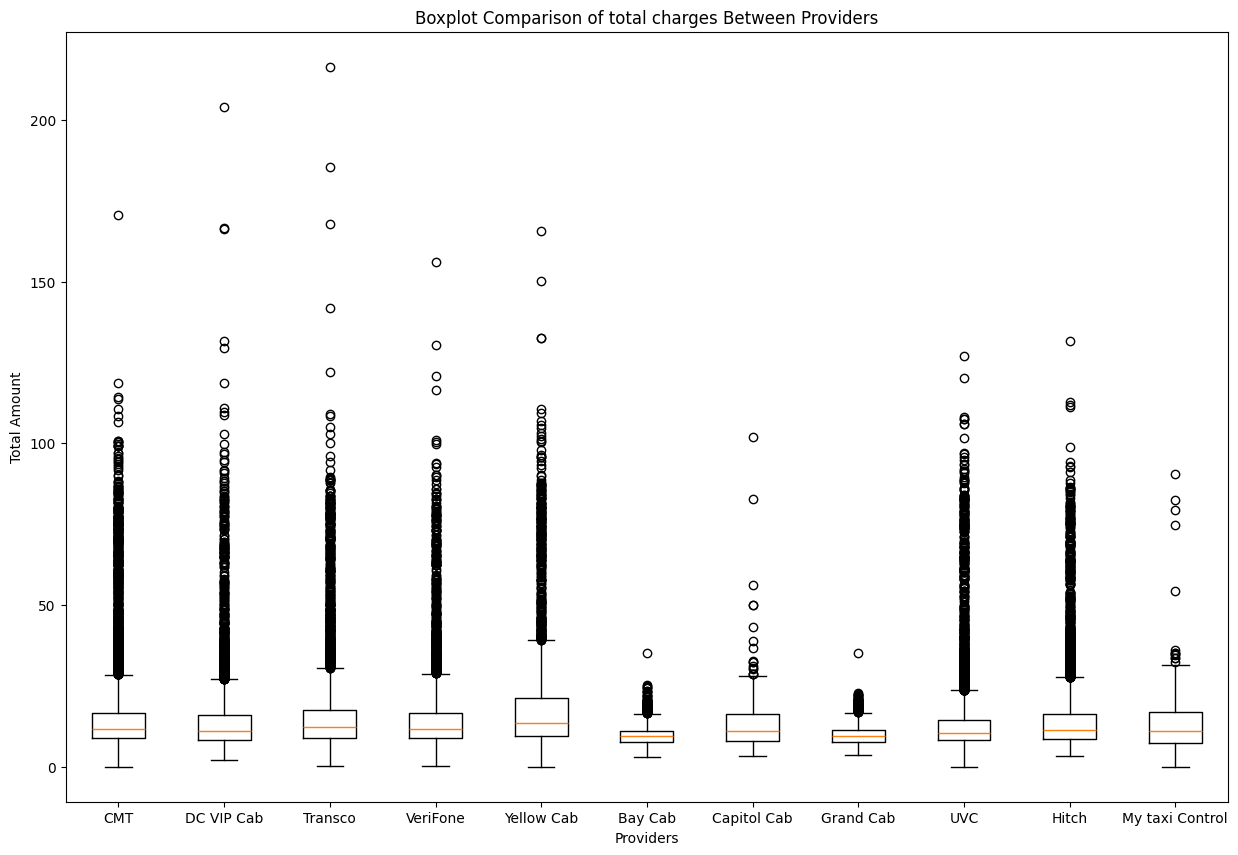

In [77]:
Provider_name_arr= [
    "CMT",                
    "DC VIP Cab",         
    "Transco",            
    "VeriFone",           
    "Yellow Cab",
    "Bay Cab",            
    "Capitol Cab",        
    "Grand Cab",          
    "UVC",                
    "Hitch",              
    "My taxi Control"   
] 

df_boxplot_data = []
for i in Provider_name_arr:
    df_boxplot_data.append(df_sample_cleaned_full[df_sample_cleaned_full["PROVIDER NAME"] == i]["TotalAmount"].tolist())

plt.figure(figsize = (15,10))
plt.boxplot(df_boxplot_data,labels= Provider_name_arr)
plt.xlabel("Providers")
plt.ylabel("Total Amount")
plt.title("Boxplot Comparison of total charges Between Providers")
plt.show()



#### To truly know that there is a difference between the means of total amount of providers is I did the Kruskal-Wallis test as data analyzed is composed of categorical and quantitative data and variances between the categories are different, The Kruskal-Wallis test is done by the bootstrapping method and is double checked by using the kruskal method in scipy.

#### Import the functions needed for bootstrapping

In [78]:
# needed functions
from collections.abc import Callable


def get_bootstrap_data(data: np.array, size: int) -> np.array:
    x_shape = size
    y_shape = data.size
    
    if size > 1:
        bs_data = np.random.choice(data, size=(x_shape, y_shape))
    else:
        bs_data = np.random.choice(data, size=y_shape)
        
    return bs_data


def get_perm_data(data: np.array, n_class1: int) -> tuple:
    result = np.random.permutation(data)
    
    return (result[n_class1:], result[:n_class1])


def compute_differences(data1: np.array, data2: np.array) -> float:
    # Step 5
    return np.mean(data1) - np.mean(data2)


def get_perm_replicate(data: np.array, n_class1: int, size: int, func: Callable) -> float:
    replicates = np.empty(size)
    
    for i in range(size):
        class1, class2 = get_perm_data(data=data, n_class1=n_class1)
        replicates[i] = func(class1, class2)
        
    return replicates



#### Using the Kruskal-Wallis bootstrapping test

In [79]:
# check the means of total amound by provider 

# Your code here
# Null Hypothesis - There is no significant difference in Total Trip Charges by Provider
# Alternative hypothesis - there is significant difference in Total Trip Charges by Provider
# Kruskal-Wallis Test
df_total_data = df_sample_cleaned_full.loc[:,["PROVIDER NAME","TotalAmount"]] # Combine the data all together
Provider_name_arr= [
    "CMT",                
    "DC VIP Cab",         
    "Transco",            
    "VeriFone",           
    "Yellow Cab",
    "Bay Cab",            
    "Capitol Cab",        
    "Grand Cab",          
    "UVC",                
    "Hitch",              
    "My taxi Control"   
] 

# calculating observed 

# Sort the data for all groups/samples into ascending order in one combined set.
df_total_data_sorted = df_total_data.sort_values(by = ["TotalAmount"])

# Assign ranks to the sorted data points
Rank_arr = [i for i in range(len(df_total_data_sorted))]
df_total_data_sorted.loc[:,"Rank"] = Rank_arr

# Calculate T_j^2/n_j
df_total_data_sumcount = []
for i in Provider_name_arr:
    df_total_data_sumcount.append(df_total_data_sorted[df_total_data_sorted["PROVIDER NAME"] == i]["Rank"].tolist())

df_Tjsqslashn_arr = []
for i in range(len(Provider_name_arr)):
    df_Tjsqslashn_arr.append((np.sum(df_total_data_sumcount[i]))**float(2) / (float(len(df_total_data_sumcount[i]))))


# Calculate the H statistic:
n = len(df_total_data_sorted)
H_obs = ((12/(n*(n + 1)))*np.sum(df_Tjsqslashn_arr)) - 3*(n + 1)

H_obs

3119.386526334274

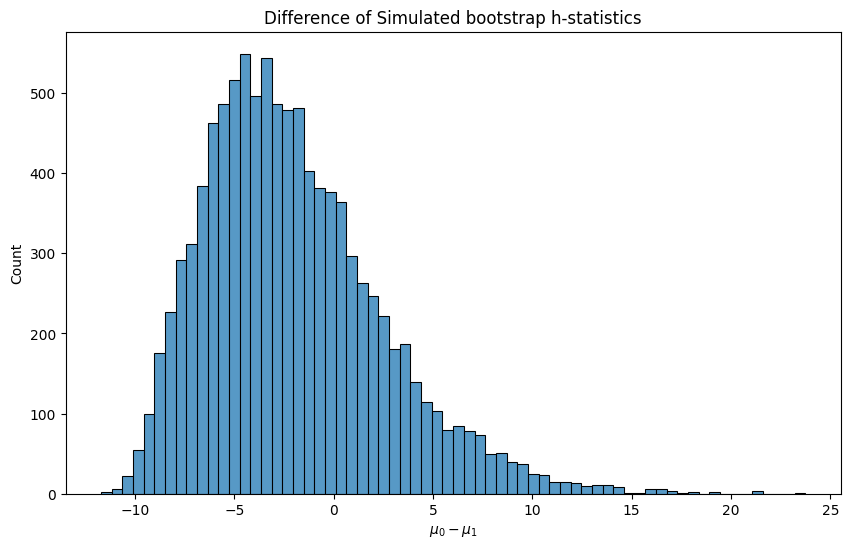

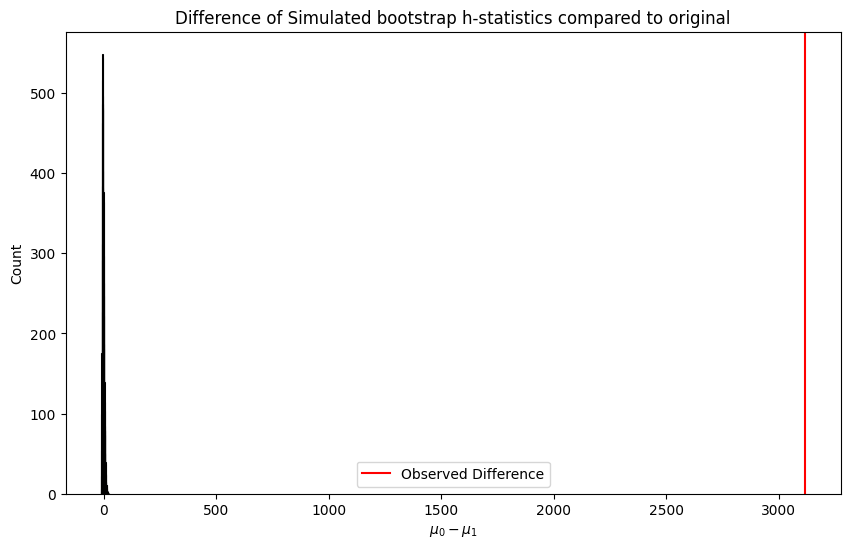

____________________________________________________________________________________________________
pvalue:  0.0000  Original h-statistic:  3119.386526334274
DECISION: REJECT THE NULL HYPOTHESIS
CONCLUSION: It is evident that THERE IS significant difference in Total Trip Charges by Provider


In [80]:
# bootstrap sampling

# initialize variables needed for bootstrap sampling
num_samples = 10000
H_bs = []
sample_df_bs = df_sample_cleaned_full.loc[:,["PROVIDER NAME", "TotalAmount"]]



# 47.3 sec per 1000 rep
for _ in range(num_samples):
    # get a bootstrap sample
    sample_df_bs["Bs_TotalAmount"] = get_bootstrap_data(sample_df_bs["TotalAmount"],1)
    # Sort the data for all groups/samples into ascending order in one combined set.
    sample_df_sorted = sample_df_bs.sort_values(by = ["Bs_TotalAmount"])
    # Assign ranks to the sorted data points
    Rank_arr_bs = [i for i in range(len(sample_df_bs))]
    sample_df_sorted.loc[:,"Bs_Rank"] = Rank_arr_bs
    # Calculate T_j^2/n_j
    sample_df_ranks_arr_bs = []
    for i in Provider_name_arr:
        sample_df_ranks_arr_bs.append(sample_df_sorted[sample_df_sorted["PROVIDER NAME"] == i]["Bs_Rank"].tolist())

    sample_df_Tjsqslashn_arr_bs = []
    for i in range(len(Provider_name_arr)):
        sample_df_Tjsqslashn_arr_bs.append((np.sum(sample_df_ranks_arr_bs[i]))**float(2) / (float(len(sample_df_ranks_arr_bs[i]))))
    # Calculate the H statistic:
    n_bs = len(sample_df_sorted)
    H_bs.append(((12/(n_bs*(n_bs + 1)))*np.sum(sample_df_Tjsqslashn_arr_bs)) - 3*(n_bs + 1))




# plotting
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(x=H_bs, ax=ax, multiple='stack')
ax.set_xlabel('$\mu_0 - \mu_1$')
ax.set_title('Difference of Simulated bootstrap h-statistics')
plt.show()


fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(x=H_bs, ax=ax, multiple='stack')
ax.axvline(H_obs, color='red', label='Observed Difference')
ax.set_xlabel('$\mu_0 - \mu_1$')
ax.set_title('Difference of Simulated bootstrap h-statistics compared to original')
ax.legend()
plt.show()

# Hypothesis testing
print("_"*100)
pvalue = np.mean(np.abs(H_bs) >= np.abs(H_obs))
print("pvalue: ", "{0:.4f}".format(pvalue)," Original h-statistic: ", H_obs)
print("DECISION:",end = "")
if pvalue <= 0.05:
    print(" REJECT THE NULL HYPOTHESIS")
    print("CONCLUSION: It is evident that THERE IS significant difference in Total Trip Charges by Provider")
else:
    print(" DO NOT REJECT THE NULL HYPOTHESIS")
    print("CONCLUSION: It is evident that THERE IS NO significant difference in Total Trip Charges by Provider")






In [81]:
# store to not compute repeatedly
Total_trip_charges_h_stats = H_bs
Total_trip_charges_h_obs = H_obs
Total_trip_charges_pval = pvalue

#### Checking if the bootstrap Kruskal-Wallis is true

In [82]:
# check 

from scipy.stats import kruskal



kruskal(df_boxplot_data[0],
         df_boxplot_data[1],
         df_boxplot_data[2],
         df_boxplot_data[3],
         df_boxplot_data[4],
         df_boxplot_data[5],
         df_boxplot_data[6],
         df_boxplot_data[7],
         df_boxplot_data[8],
         df_boxplot_data[9],
         df_boxplot_data[10])

KruskalResult(statistic=3131.2764470862526, pvalue=0.0)

#### Now that I know there is a significant difference in means of total amount by provider, I check to see if there are differences in Milage if the trip by provider

In [83]:
df_sample_cleaned_full.groupby("PROVIDER NAME",observed= True)["Milage"].describe()

,count,mean,std,min,25%,50%,75%,max
PROVIDER NAME,,,,,,,,
CMT,20589.0,2.630094,3.572181,0.0,1.0000,2.000,3.0000,54.000000
DC VIP Cab,10412.0,2.610846,3.530495,0.0,0.9800,1.600,3.0000,74.599998
Transco,12385.0,3.132796,3.923256,0.0,1.1500,1.960,3.9000,97.230003
VeriFone,8452.0,2.998915,3.809881,0.0,1.1000,1.800,3.5000,54.900002
Yellow Cab,10400.0,5.196076,11.628551,0.0,1.3700,2.750,5.4625,177.000000
Bay Cab,3310.0,1.407861,0.967045,0.0,0.8200,1.220,1.7300,8.000000
Capitol Cab,484.0,2.813347,3.384629,0.0,1.0800,1.715,3.8225,36.700001
Grand Cab,1859.0,1.418863,0.987430,0.0,0.8100,1.190,1.6850,6.440000
UVC,15990.0,2.520458,3.397552,0.0,0.9600,1.520,2.8000,44.299999


#### Creating a boxplot for more insight

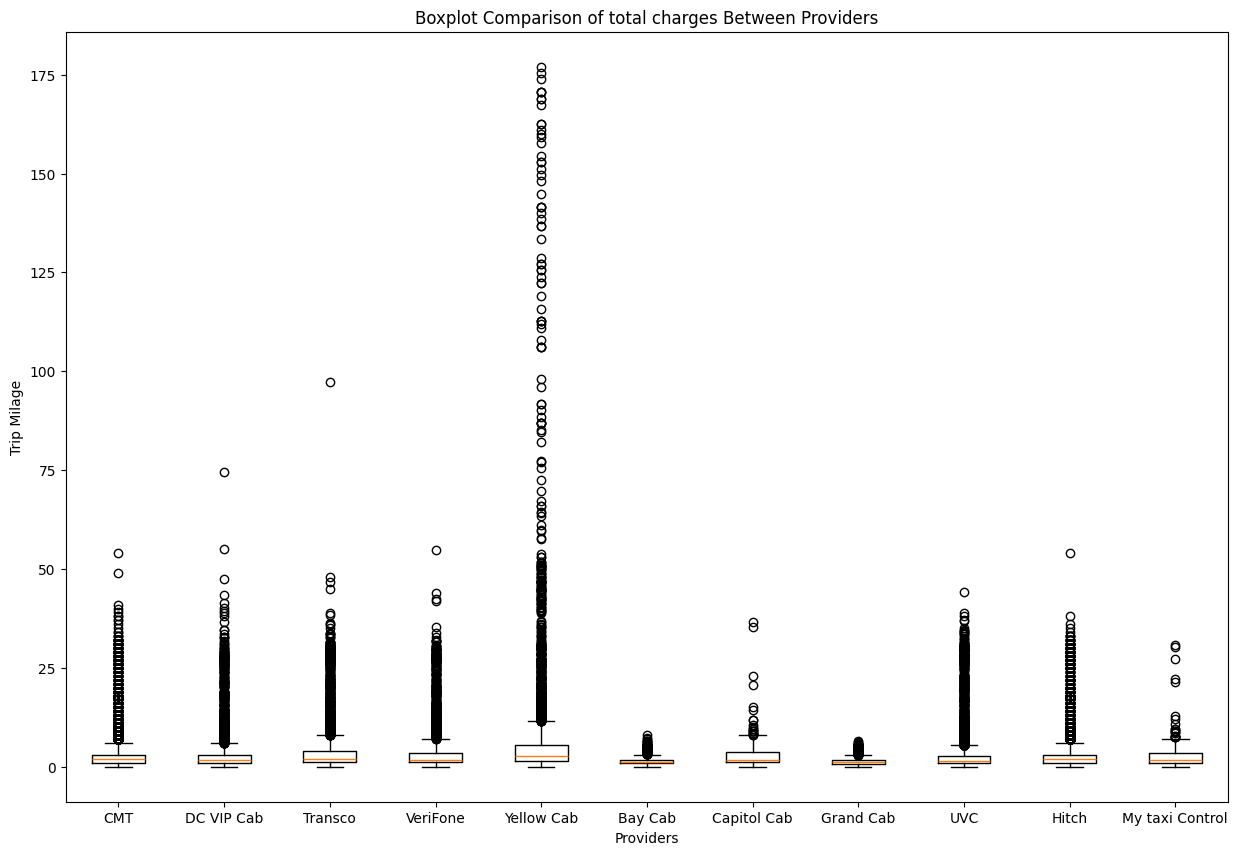

In [84]:
Provider_name_arr= [
    "CMT",                
    "DC VIP Cab",         
    "Transco",            
    "VeriFone",           
    "Yellow Cab",
    "Bay Cab",            
    "Capitol Cab",        
    "Grand Cab",          
    "UVC",                
    "Hitch",              
    "My taxi Control"   
] 

df_boxplot_data = []
for i in Provider_name_arr:
    df_boxplot_data.append(df_sample_cleaned_full[df_sample_cleaned_full["PROVIDER NAME"] == i]["Milage"].tolist())

plt.figure(figsize = (15,10))
plt.boxplot(df_boxplot_data,labels= Provider_name_arr)
plt.xlabel("Providers")
plt.ylabel("Trip Milage")
plt.title("Boxplot Comparison of total charges Between Providers")
plt.show()

#### Performing the Kruskal-Wallis bootstrapping test

In [85]:
# check the means of Milage per provider 

# Your code here
# Null Hypothesis - There is no significant difference in trip milage by Provider
# Alternative hypothesis - there is significant difference in trip milage by Provider
# Kruskal-Wallis Test
df_total_data = df_sample_cleaned_full.loc[:,["PROVIDER NAME","Milage"]] # Combine the data all together
Provider_name_arr= [
    "CMT",                
    "DC VIP Cab",         
    "Transco",            
    "VeriFone",           
    "Yellow Cab",
    "Bay Cab",            
    "Capitol Cab",        
    "Grand Cab",          
    "UVC",                
    "Hitch",              
    "My taxi Control"   
] 

# calculating observed 

# Sort the data for all groups/samples into ascending order in one combined set.
df_total_data_sorted = df_total_data.sort_values(by = ["Milage"])

# Assign ranks to the sorted data points
Rank_arr = [i for i in range(len(df_total_data_sorted))]
df_total_data_sorted.loc[:,"Rank"] = Rank_arr

# Calculate T_j^2/n_j
df_total_data_sumcount = []
for i in Provider_name_arr:
    df_total_data_sumcount.append(df_total_data_sorted[df_total_data_sorted["PROVIDER NAME"] == i]["Rank"].tolist())

df_Tjsqslashn_arr = []
for i in range(len(Provider_name_arr)):
    df_Tjsqslashn_arr.append((np.sum(df_total_data_sumcount[i]))**float(2) / (float(len(df_total_data_sumcount[i]))))


# Calculate the H statistic:
n = len(df_total_data_sorted)
H_obs = ((12/(n*(n + 1)))*np.sum(df_Tjsqslashn_arr)) - 3*(n + 1)



H_obs

3914.5176452450105

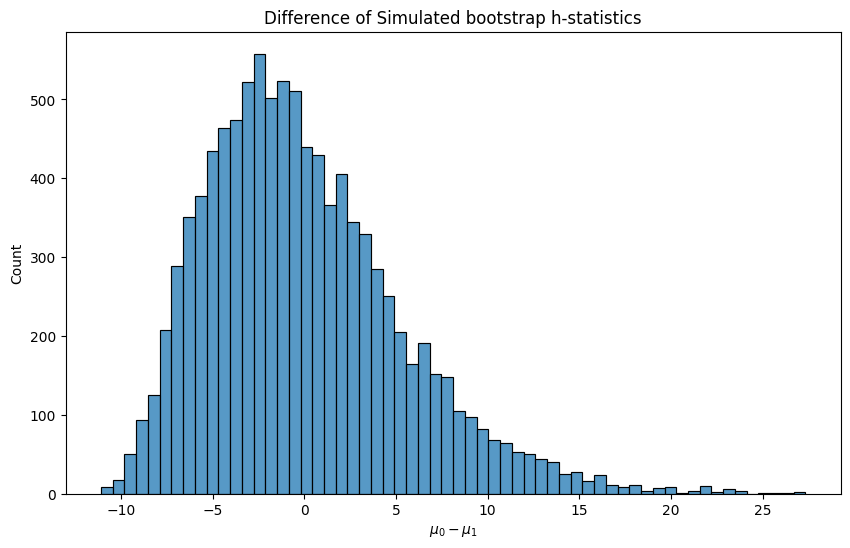

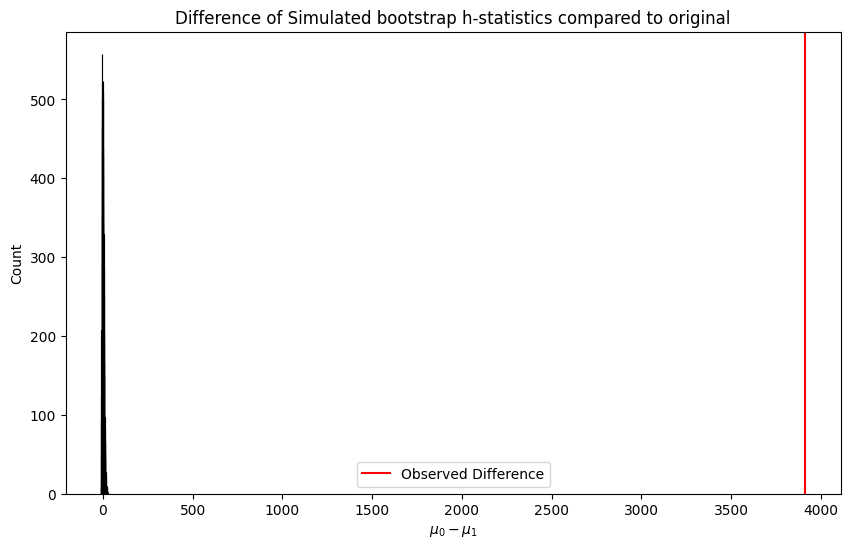

____________________________________________________________________________________________________
pvalue:  0.0000  Original h-statistic:  3914.5176452450105
DECISION: REJECT THE NULL HYPOTHESIS
CONCLUSION: It is evident that THERE IS significant difference in trip milage by Provider


In [86]:
# bootstrap sampling

# initialize variables needed for bootstrap sampling
num_samples = 10000
H_bs = []
sample_df_bs = df_sample_cleaned_full.loc[:,["PROVIDER NAME", "Milage"]]



# 47.3 sec per 1000 rep
for _ in range(num_samples):
    # get a bootstrap sample
    sample_df_bs["Bs_Milage"] = get_bootstrap_data(sample_df_bs["Milage"],1)
    # Sort the data for all groups/samples into ascending order in one combined set.
    sample_df_sorted = sample_df_bs.sort_values(by = ["Bs_Milage"])
    # Assign ranks to the sorted data points
    Rank_arr_bs = [i for i in range(len(sample_df_bs))]
    sample_df_sorted.loc[:,"Bs_Rank"] = Rank_arr_bs
    # Calculate T_j^2/n_j
    sample_df_ranks_arr_bs = []
    for i in Provider_name_arr:
        sample_df_ranks_arr_bs.append(sample_df_sorted[sample_df_sorted["PROVIDER NAME"] == i]["Bs_Rank"].tolist())

    sample_df_Tjsqslashn_arr_bs = []
    for i in range(len(Provider_name_arr)):
        sample_df_Tjsqslashn_arr_bs.append((np.sum(sample_df_ranks_arr_bs[i]))**float(2) / (float(len(sample_df_ranks_arr_bs[i]))))
    # Calculate the H statistic:
    n_bs = len(sample_df_sorted)
    H_bs.append(((12/(n_bs*(n_bs + 1)))*np.sum(sample_df_Tjsqslashn_arr_bs)) - 3*(n_bs + 1))




# plotting
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(x=H_bs, ax=ax, multiple='stack')
ax.set_xlabel('$\mu_0 - \mu_1$')
ax.set_title('Difference of Simulated bootstrap h-statistics')
plt.show()


fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(x=H_bs, ax=ax, multiple='stack')
ax.axvline(H_obs, color='red', label='Observed Difference')
ax.set_xlabel('$\mu_0 - \mu_1$')
ax.set_title('Difference of Simulated bootstrap h-statistics compared to original')
ax.legend()
plt.show()

# Hypothesis testing
print("_"*100)
pvalue = np.mean(np.abs(H_bs) >= np.abs(H_obs))
print("pvalue: ", "{0:.4f}".format(pvalue)," Original h-statistic: ", H_obs)
print("DECISION:",end = "")
if pvalue <= 0.05:
    print(" REJECT THE NULL HYPOTHESIS")
    print("CONCLUSION: It is evident that THERE IS significant difference in trip milage by Provider")
else:
    print(" DO NOT REJECT THE NULL HYPOTHESIS")
    print("CONCLUSION: It is evident that THERE IS NO significant difference in trip milage by Provider")


In [87]:
# store to not compute repeatedly
Total_trip_milage_h_stats = H_bs
Total_trip_milage_h_obs = H_obs
Total_trip_milage_pval = pvalue

#### Checking if the bootstrap test is true

In [88]:
# test 


kruskal(df_boxplot_data[0],
         df_boxplot_data[1],
         df_boxplot_data[2],
         df_boxplot_data[3],
         df_boxplot_data[4],
         df_boxplot_data[5],
         df_boxplot_data[6],
         df_boxplot_data[7],
         df_boxplot_data[8],
         df_boxplot_data[9],
         df_boxplot_data[10])

KruskalResult(statistic=3899.69113331438, pvalue=0.0)

#### Lastly is I checked if there is a difference between the duration of taxi trips by provider

In [89]:
df_sample_cleaned_full.groupby("PROVIDER NAME", observed = True)["Duration"].describe()

,count,mean,std,min,25%,50%,75%,max
PROVIDER NAME,,,,,,,,
CMT,20589.0,13.001894,9.504605,0.0,7.0,11.0,16.0,210.0
DC VIP Cab,10412.0,113.552536,199.864685,1.0,10.0,16.0,36.0,720.0
Transco,12385.0,13.715866,9.962102,0.0,8.0,12.0,17.0,337.0
VeriFone,8452.0,14.020232,18.546961,0.0,8.0,12.0,17.0,515.0
Yellow Cab,10400.0,20.420095,51.039780,0.0,8.0,12.0,19.0,699.0
Bay Cab,3310.0,448.062225,168.551712,3.0,328.0,465.0,583.0,720.0
Capitol Cab,484.0,132.842972,221.328705,0.0,7.0,14.0,185.0,714.0
Grand Cab,1859.0,452.637451,165.719543,3.0,332.5,463.0,593.0,720.0
UVC,15990.0,167.233215,232.040985,0.0,9.0,16.0,355.0,720.0


#### Create boxplot for more insight

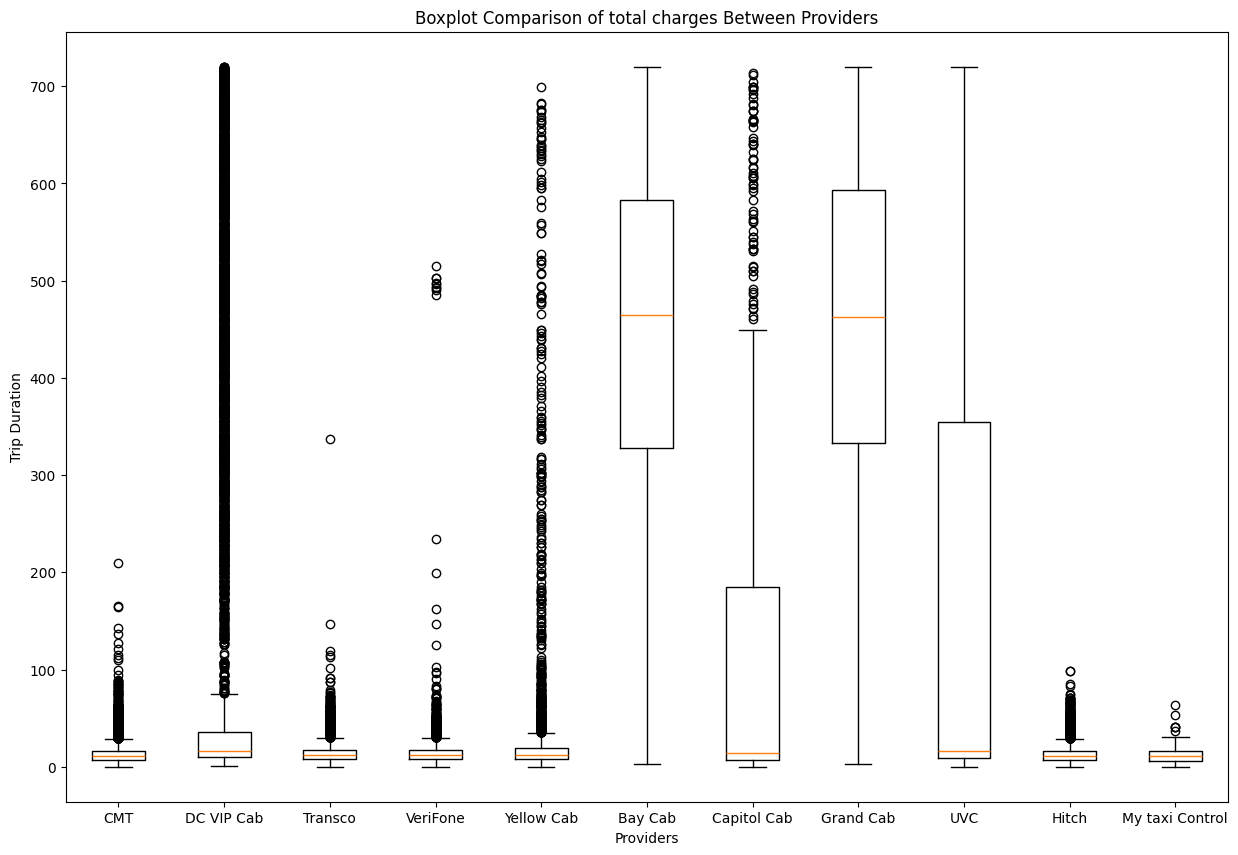

In [90]:
Provider_name_arr= [
    "CMT",                
    "DC VIP Cab",         
    "Transco",            
    "VeriFone",           
    "Yellow Cab",
    "Bay Cab",            
    "Capitol Cab",        
    "Grand Cab",          
    "UVC",                
    "Hitch",              
    "My taxi Control"   
] 

df_boxplot_data = []
for i in Provider_name_arr:
    df_boxplot_data.append(df_sample_cleaned_full[df_sample_cleaned_full["PROVIDER NAME"] == i]["Duration"].tolist())

plt.figure(figsize = (15,10))
plt.boxplot(df_boxplot_data,labels= Provider_name_arr)
plt.xlabel("Providers")
plt.ylabel("Trip Duration")
plt.title("Boxplot Comparison of total charges Between Providers")
plt.show()

#### Perform Kruskal-Wallis bootstrap test

In [91]:
# check the means of Duration per provider 

# Your code here
# Null Hypothesis - There is no significant difference in trip duration by Provider
# Alternative hypothesis - there is significant difference in trip duration by Provider
# Kruskal-Wallis Test
df_total_data = df_sample_cleaned_full.loc[:,["PROVIDER NAME","Duration"]] # Combine the data all together
Provider_name_arr= [
    "CMT",                
    "DC VIP Cab",         
    "Transco",            
    "VeriFone",           
    "Yellow Cab",
    "Bay Cab",            
    "Capitol Cab",        
    "Grand Cab",          
    "UVC",                
    "Hitch",              
    "My taxi Control"   
] 

# calculating observed 

# Sort the data for all groups/samples into ascending order in one combined set.
df_total_data_sorted = df_total_data.sort_values(by = ["Duration"])

# Assign ranks to the sorted data points
Rank_arr = [i for i in range(len(df_total_data_sorted))]
df_total_data_sorted.loc[:,"Rank"] = Rank_arr

# Calculate T_j^2/n_j
df_total_data_sumcount = []
for i in Provider_name_arr:
    df_total_data_sumcount.append(df_total_data_sorted[df_total_data_sorted["PROVIDER NAME"] == i]["Rank"].tolist())

df_Tjsqslashn_arr = []
for i in range(len(Provider_name_arr)):
    df_Tjsqslashn_arr.append((np.sum(df_total_data_sumcount[i]))**float(2) / (float(len(df_total_data_sumcount[i]))))


# Calculate the H statistic:
n = len(df_total_data_sorted)
H_obs = ((12/(n*(n + 1)))*np.sum(df_Tjsqslashn_arr)) - 3*(n + 1)



H_obs

17851.169590299425

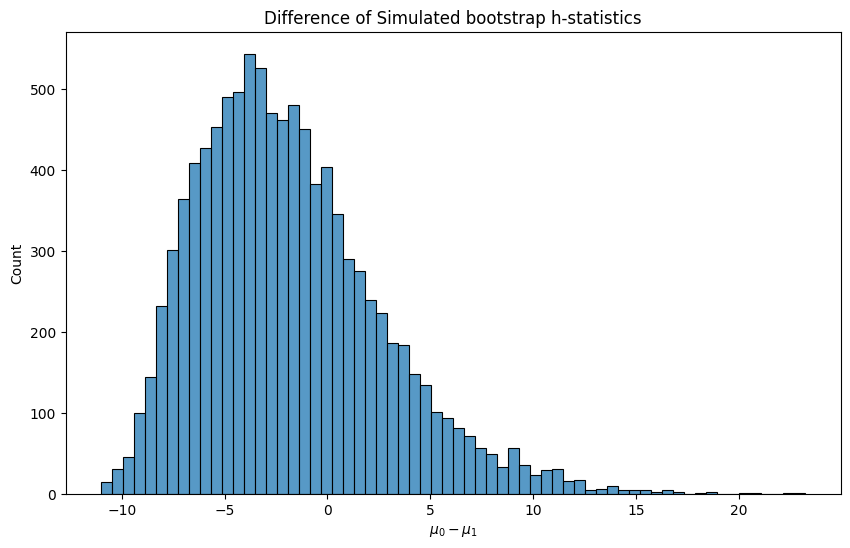

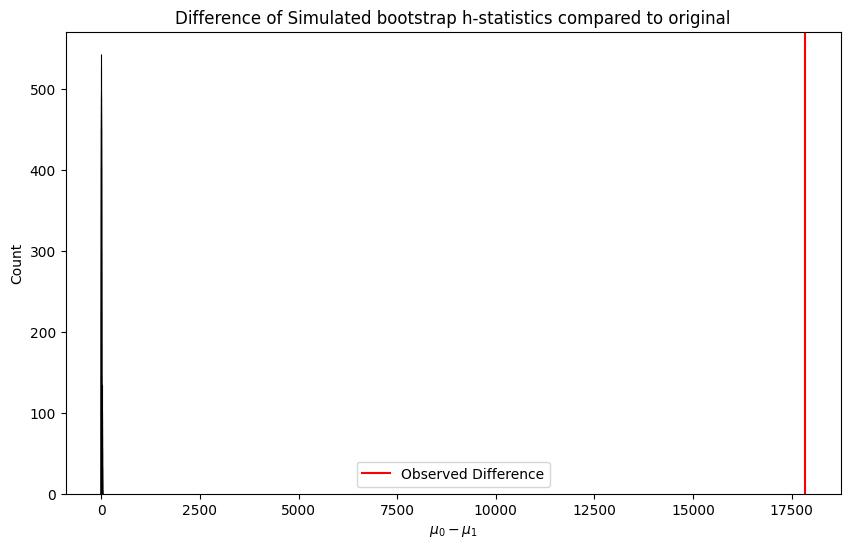

____________________________________________________________________________________________________
pvalue:  0.0000  Original h-statistic:  17851.169590299425
DECISION: REJECT THE NULL HYPOTHESIS
CONCLUSION: It is evident that THERE IS significant difference in trip duration by Provider


In [92]:
# bootstrap sampling

# initialize variables needed for bootstrap sampling
num_samples = 10000
H_bs = []
sample_df_bs = df_sample_cleaned_full.loc[:,["PROVIDER NAME", "Duration"]]



# 47.3 sec per 1000 rep
for _ in range(num_samples):
    # get a bootstrap sample
    sample_df_bs["Bs_Duration"] = get_bootstrap_data(sample_df_bs["Duration"],1)
    # Sort the data for all groups/samples into ascending order in one combined set.
    sample_df_sorted = sample_df_bs.sort_values(by = ["Bs_Duration"])
    # Assign ranks to the sorted data points
    Rank_arr_bs = [i for i in range(len(sample_df_bs))]
    sample_df_sorted.loc[:,"Bs_Rank"] = Rank_arr_bs
    # Calculate T_j^2/n_j
    sample_df_ranks_arr_bs = []
    for i in Provider_name_arr:
        sample_df_ranks_arr_bs.append(sample_df_sorted[sample_df_sorted["PROVIDER NAME"] == i]["Bs_Rank"].tolist())

    sample_df_Tjsqslashn_arr_bs = []
    for i in range(len(Provider_name_arr)):
        sample_df_Tjsqslashn_arr_bs.append((np.sum(sample_df_ranks_arr_bs[i]))**float(2) / (float(len(sample_df_ranks_arr_bs[i]))))
    # Calculate the H statistic:
    n_bs = len(sample_df_sorted)
    H_bs.append(((12/(n_bs*(n_bs + 1)))*np.sum(sample_df_Tjsqslashn_arr_bs)) - 3*(n_bs + 1))




# plotting
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(x=H_bs, ax=ax, multiple='stack')
ax.set_xlabel('$\mu_0 - \mu_1$')
ax.set_title('Difference of Simulated bootstrap h-statistics')
plt.show()


fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(x=H_bs, ax=ax, multiple='stack')
ax.axvline(H_obs, color='red', label='Observed Difference')
ax.set_xlabel('$\mu_0 - \mu_1$')
ax.set_title('Difference of Simulated bootstrap h-statistics compared to original')
ax.legend()
plt.show()

# Hypothesis testing
print("_"*100)
pvalue = np.mean(np.abs(H_bs) >= np.abs(H_obs))
print("pvalue: ", "{0:.4f}".format(pvalue)," Original h-statistic: ", H_obs)
print("DECISION:",end = "")
if pvalue <= 0.05:
    print(" REJECT THE NULL HYPOTHESIS")
    print("CONCLUSION: It is evident that THERE IS significant difference in trip duration by Provider")
else:
    print(" DO NOT REJECT THE NULL HYPOTHESIS")
    print("CONCLUSION: It is evident that THERE IS NO significant difference in trip duration by Provider")


In [93]:
# store to not compute repeatedly
Total_trip_duration_h_stats = H_bs
Total_trip_duration_h_obs = H_obs
Total_trip_duration_pval = pvalue

#### Checking if the bootstrap test is true

In [94]:

kruskal(df_boxplot_data[0],
         df_boxplot_data[1],
         df_boxplot_data[2],
         df_boxplot_data[3],
         df_boxplot_data[4],
         df_boxplot_data[5],
         df_boxplot_data[6],
         df_boxplot_data[7],
         df_boxplot_data[8],
         df_boxplot_data[9],
         df_boxplot_data[10])

KruskalResult(statistic=17903.507345137506, pvalue=0.0)

### Now that we know that there is significant evidence that the means of Total Amount, Duration, and Milage are different by provider. We will look at the means of each provider to know what provider provides the better service in comparision to other providers

In [95]:
df_sample_cleaned_full.groupby("PROVIDER NAME",observed=True)["TotalAmount"].mean().sort_values(ascending =True)

PROVIDER NAME
Bay Cab             9.529831
Grand Cab           9.856422
UVC                12.820976
Capitol Cab        13.211385
My taxi Control    13.569111
DC VIP Cab         13.610929
Hitch              13.700873
CMT                14.239275
VeriFone           14.444237
Transco            14.843058
Yellow Cab         16.718428
Name: TotalAmount, dtype: float32

In [96]:
df_sample_cleaned_full.groupby("PROVIDER NAME",observed=True)["Milage"].mean().sort_values(ascending = False)

PROVIDER NAME
Yellow Cab         5.196076
Transco            3.132796
VeriFone           2.998915
My taxi Control    2.977630
Capitol Cab        2.813347
Hitch              2.808655
CMT                2.630094
DC VIP Cab         2.610846
UVC                2.520458
Grand Cab          1.418863
Bay Cab            1.407861
Name: Milage, dtype: float32

In [97]:
df_sample_cleaned_full.groupby("PROVIDER NAME",observed=True)["Duration"].mean().sort_values(ascending = True)

PROVIDER NAME
My taxi Control     11.966666
Hitch               12.681581
CMT                 13.001894
Transco             13.715866
VeriFone            14.020232
Yellow Cab          20.420095
DC VIP Cab         113.552536
Capitol Cab        132.842972
UVC                167.233215
Bay Cab            448.062225
Grand Cab          452.637451
Name: Duration, dtype: float32

### FINDINGS
### BASED ON THE MEANS OF TOTAL AMOUNT,MILAGE, AND DURATION, **MY TAXI CONTROL** IS THE BEST PROVIDER AS IT PROVIDES ON AVERAGE 5TH LOWEST TOTAL FARE WITH THE 4TH LONGEST MILE AND THE LEAST TRIP DURATION COMPARED TO ALL TAXI PROVIDERS

# REFERENCE 

How many miles does an average taxi cab driver drive yearly? (2019, July 26). Career Trend. https://careertrend.com/how-many-miles-does-an-average-taxi-cab-driver-drive-yearly-13658842.html

Taxicab fares. (n.d.). Dc Taxi. https://dfhv.dc.gov/page/taxicab-fares

# DATA VISUALIZATION WITH COMBINED ANALYSIS

- bar plot 
- pie chart
- line plot 

In [5]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np
from scipy import stats

In [6]:
df_sample_cleaned_full = pd.read_csv("df_taxi_cleaned_data.csv")

In [7]:
total_fare_amount_data = df_sample_cleaned_full.groupby("PROVIDER NAME",observed=True)["TotalAmount"].mean().round(2).sort_values(ascending =True)

by = ['Bay Cab',
 'Grand Cab',
 'UVC',
 'Capitol Cab',
 'My taxi Control',
 'DC VIP Cab',
 'Hitch',
 'CMT',
 'VeriFone',
 'Transco',
 'Yellow Cab']

In [8]:
milage_data =  df_sample_cleaned_full.groupby("PROVIDER NAME",observed=True)["Milage"].mean().round(2).sort_values(ascending = False)




In [9]:
duration_data =  df_sample_cleaned_full.groupby("PROVIDER NAME",observed=True)["Duration"].mean().round(2).sort_values(ascending =True)


In [10]:
total_fare_ranking = dict()
for i,j in enumerate(total_fare_amount_data.keys()):
    total_fare_ranking[j] = i + 1

milage_ranking = dict()
for i,j in enumerate(milage_data.keys()):
    milage_ranking[j] = i + 1

duration_ranking = dict()
for i,j in enumerate(duration_data.keys()):
    duration_ranking[j] = i + 1



In [11]:
fare_marker_color_index_map_arr = dict()
i2 =0
for i,j in enumerate(total_fare_amount_data.keys()):
    if i < 5:
        fare_marker_color_index_map_arr[j] = i 
    else:
        fare_marker_color_index_map_arr[j] = i2
        i2+=1

milage_marker_color_index_map_arr = dict()
i2 =0
for i,j in enumerate(milage_data.keys()):
    if i < 5:
        milage_marker_color_index_map_arr[j] = i 
    else:
        milage_marker_color_index_map_arr[j] = i2
        i2+=1

duration_marker_color_index_map_arr = dict()
i2 =0
for i,j in enumerate(duration_data.keys()):
    if i < 5:
        duration_marker_color_index_map_arr[j] = i 
    else:
        duration_marker_color_index_map_arr[j] = i2
        i2+=1



In [12]:
bar_design_temp_arr =  ['', '/', '\\', 'x', '-', '|', '+', '.']


In [20]:
chosen = "Bay Cab"
i = 3

In [21]:
color_matrix = ['#000000','#000000','#000000','#000000','#000000','#000000']
design_matrix = ['','','','','','']
design_matrix[fare_marker_color_index_map_arr[chosen]] = bar_design_temp_arr[i]
color_matrix[fare_marker_color_index_map_arr[chosen]] = "#4CAF50"

In [22]:
# change plot size, text font, marker shape, and color 
if total_fare_ranking[chosen] < 6:
    bottom_top_index = [0,5]
elif total_fare_ranking[chosen] >= 6:
    bottom_top_index = [5,11]

fig2 = go.Figure()
fig2.add_trace(go.Bar(x= total_fare_amount_data.values[bottom_top_index[0]:bottom_top_index[1]], y= total_fare_amount_data.keys()[bottom_top_index[0]:bottom_top_index[1]],orientation= 'h',
                      text = [f'#{total_fare_ranking[i]}' for i in total_fare_amount_data.keys()][bottom_top_index[0]:bottom_top_index[1]],textposition="outside",marker_pattern_shape = design_matrix))
fig2.update_traces(marker = dict(color = color_matrix), textfont=dict(family="verdana, sans-serif", size=13))
fig2.update_layout(
    height = 600,
    width = 700,
    title = "Difference of Total Amount Means by Provider",
    xaxis=dict(
        title='Means',
        title_font=dict(size=14, family="verdana, sans-serif"),
        tickfont=dict(size=14, family="verdana, sans-serif")  # Set the font size of the tick labels
    ),
    yaxis=dict(
        title='Providers',
        title_font=dict(size=14, family="verdana, sans-serif"),
        tickfont=dict(size=14, family="verdana, sans-serif")  # Set the font size of the tick labels
    ),
    font=dict(family="verdana, sans-serif", size=8, color="Black")
)

In [23]:
color_matrix = ['#000000','#000000','#000000','#000000','#000000','#000000']
design_matrix = ['','','','','','']
design_matrix[milage_marker_color_index_map_arr[chosen]] = bar_design_temp_arr[i]
color_matrix[milage_marker_color_index_map_arr[chosen]] = "#4CAF50"

In [24]:
# change plot size, text font, marker shape, and color 
if milage_ranking[chosen] < 6:
    bottom_top_index = [0,5]
elif milage_ranking[chosen] >= 6:
    bottom_top_index = [5,11]


fig2 = go.Figure()
fig2.add_trace(go.Bar(x= milage_data.values[bottom_top_index[0]:bottom_top_index[1]], y= milage_data.keys()[bottom_top_index[0]:bottom_top_index[1]],orientation= 'h',
                      text = [f'#{milage_ranking[i]}' for i in milage_data.keys()][bottom_top_index[0]:bottom_top_index[1]],textposition="outside",marker_pattern_shape = design_matrix))
fig2.update_traces(marker = dict(color = color_matrix), textfont=dict(family="verdana, sans-serif", size=13))
fig2.update_layout(
    height = 400,
    width = 700,
    title = "Difference of Average Trip Milage Means by Provider",
    xaxis=dict(
        title='Means',
        title_font=dict(size=14, family="verdana, sans-serif"),
        tickfont=dict(size=14, family="verdana, sans-serif")  # Set the font size of the tick labels
    ),
    yaxis=dict(
        title='Providers',
        title_font=dict(size=14, family="verdana, sans-serif"),
        tickfont=dict(size=14, family="verdana, sans-serif")  # Set the font size of the tick labels
    ),
    font=dict(family="verdana, sans-serif", size=8, color="Black")
)

In [25]:
color_matrix = ['#000000','#000000','#000000','#000000','#000000','#000000']
design_matrix = ['','','','','','']
design_matrix[duration_marker_color_index_map_arr[chosen]] = bar_design_temp_arr[i]
color_matrix[duration_marker_color_index_map_arr[chosen]] = "#4CAF50"

In [26]:
# change plot size, text font, marker shape, and color 
if duration_ranking[chosen] < 6:
    bottom_top_index = [0,5]
elif duration_ranking[chosen] >= 6:
    bottom_top_index = [5,11]

fig2 = go.Figure()
fig2.add_trace(go.Bar(x= duration_data.values[bottom_top_index[0]:bottom_top_index[1]], y= duration_data.keys()[bottom_top_index[0]:bottom_top_index[1]],orientation= 'h',
                      text = [f'#{duration_ranking[i]}' for i in duration_data.keys()][bottom_top_index[0]:bottom_top_index[1]], textposition="outside",marker_pattern_shape = design_matrix ))
fig2.update_traces(marker = dict(color = color_matrix), textfont=dict(family="verdana, sans-serif", size=10))
fig2.update_layout(
    height = 500,
    width = 600,
    title = "Difference of Duration Means by Provider",
    xaxis=dict(
        title='Means',
        title_font=dict(size=14, family="verdana, sans-serif"),
        tickfont=dict(size=14, family="verdana, sans-serif")  # Set the font size of the tick labels
    ),
    yaxis=dict(
        title='Providers',
        title_font=dict(size=14, family="verdana, sans-serif"),
        tickfont=dict(size=14, family="verdana, sans-serif")  # Set the font size of the tick labels
    ),
    font=dict(family="verdana, sans-serif", size=8, color="Black")
)